In [1]:
pip install streamlit pandas


^C
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ortools 9.10.4067 requires protobuf>=5.26.1, but you have protobuf 4.25.5 which is incompatible.

[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/413.4 kB ? eta -:--:--
   - ------------------------------------- 20.5/413.4 kB 682.7 kB/s eta 0:00:01
   --- ----------------------------------- 41.0/413.4 kB 653.6 kB/s eta 0:00:01
   --------- ---------------------------- 102.4/413.4 kB 845.5 kB/s eta 0:00:01
   ---------------------- ----------------- 235.5/413.4 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 413.4/413.4 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.27.1
    Uninstalling protobuf-5.27.1:
      Successfully uninstalled protobuf-5.27.1


In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [10]:
def load_data():
    df = pd.read_csv("housing.csv")
    return df
data = load_data()

In [11]:
st.sidebar.header("Filters")
price_filter = st.sidebar.slider('Select Median House Value Range', int(data['median_house_value'].min()), int(data['median_house_value'].max()), (50000, 300000))

In [12]:
# 位置类型选择器
ocean_proximity = st.sidebar.multiselect(
    'Select Location Type',
    options=data['ocean_proximity'].unique(),
    default=data['ocean_proximity'].unique()
)

In [13]:
# 收入水平选择器
income_level = st.sidebar.radio(
    "Select Income Level",
    ('Low', 'Medium', 'High')
)

In [14]:
# 筛选数据
filtered_data = data[
    (data['median_house_value'] >= price_filter[0]) & 
    (data['median_house_value'] <= price_filter[1]) &
    (data['ocean_proximity'].isin(ocean_proximity))
]

In [15]:
# 通过收入水平筛选
if income_level == 'Low':
    filtered_data = filtered_data[filtered_data['median_income'] <= 2.5]
elif income_level == 'Medium':
    filtered_data = filtered_data[(filtered_data['median_income'] > 2.5) & (filtered_data['median_income'] < 4.5)]
else:
    filtered_data = filtered_data[filtered_data['median_income'] > 4.5]


In [16]:
# 显示地图
st.map(filtered_data)

DeltaGenerator()

DeltaGenerator()

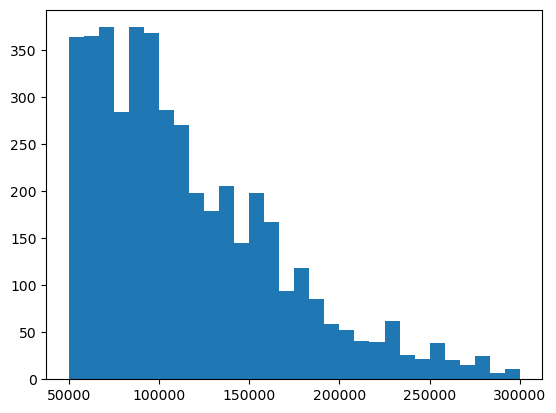

In [17]:

st.subheader("Histogram of Median House Value")
plt.hist(filtered_data['median_house_value'], bins=30)
st.pyplot(plt)

In [18]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip
